In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
import kagglehub
import os

# Download latest version
path = kagglehub.dataset_download("subhajournal/android-ransomware-detection")
path = os.path.join(path, "Android_Ransomeware.csv")
print("Path to dataset files:", path)

# Load the dataset
df = pd.read_csv(path)  # Adjust file path if needed

# Encode target labels (Ransomware family) and non numerical variables like IP Addresses
label_enc = LabelEncoder()
df['Label'] = label_enc.fit_transform(df['Label'])
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))

Path to dataset files: /home/drunkencloud/.cache/kagglehub/datasets/subhajournal/android-ransomware-detection/versions/1/Android_Ransomeware.csv


In [6]:
# Separate features and target
X = df.drop(columns=['Label'])  # remove categorical + encoded target
y = df['Label']

# Preprocess
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, test_size=0.2, random_state=42)

# Model training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Classification Report:
               precision    recall  f1-score   support

      Benign       1.00      1.00      1.00      8618
     Charger       0.93      0.93      0.93      7910
       Jisut       0.96      0.97      0.97      5135
       Koler       0.97      0.98      0.97      8911
   Lockerpin       0.97      0.88      0.92      5061
      Pletor       0.98      0.95      0.97       943
   PornDroid       0.96      0.99      0.97      9217
    RansomBO       0.98      1.00      0.99      7972
      SVpeng       1.00      1.00      1.00     10832
  Simplocker       0.99      0.98      0.99      7268
 WannaLocker       1.00      1.00      1.00      6540

    accuracy                           0.98     78407
   macro avg       0.98      0.97      0.97     78407
weighted avg       0.98      0.98      0.98     78407



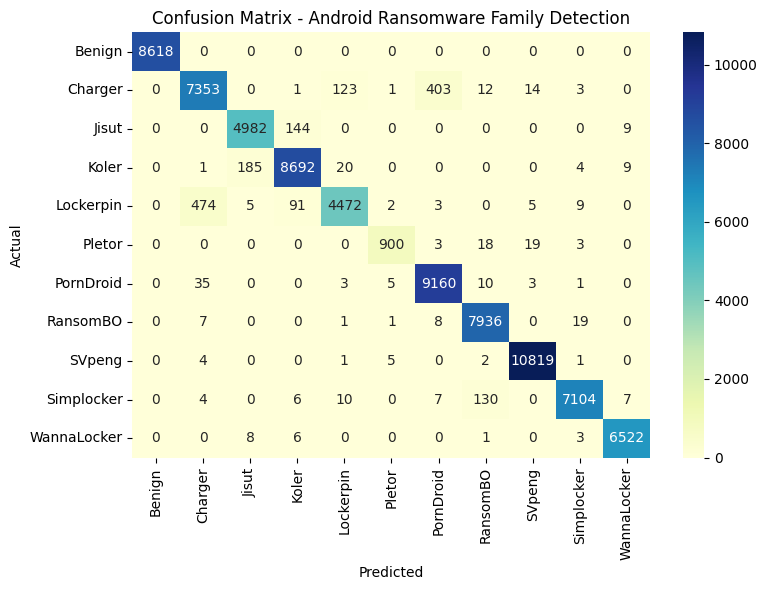

In [5]:
# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=label_enc.classes_))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=label_enc.classes_, yticklabels=label_enc.classes_)
plt.title("Confusion Matrix - Android Ransomware Family Detection")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()